In [93]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from sklearn import metrics
from tensorflow.keras.optimizers import Adam
from sklearn.svm import LinearSVC
from keras.models import Model


In [94]:
# Image data preprocecing
train_path = './Train'
test_path = './Test'
imgDataGen = ImageDataGenerator(rescale=1.0/255)
train = imgDataGen.flow_from_directory(train_path,  color_mode ='grayscale', target_size = (64, 64), batch_size = 1, class_mode = 'binary')
print(train[0][0].shape)
test = imgDataGen.flow_from_directory(test_path,  color_mode ='grayscale', target_size = (64, 64), batch_size = 1, class_mode = 'binary')

Found 24998 images belonging to 2 classes.
(1, 64, 64, 1)
Found 9471 images belonging to 2 classes.


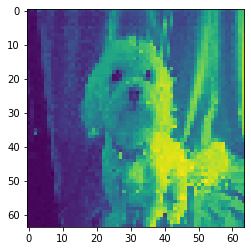

In [95]:
plt.imshow(train[0][0][0])

In [96]:
# Using the sequence model, build a CNN
# pre trained model
model = Sequential()

model.add(Conv2D(32,(3, 3), activation = 'relu', padding = 'same',input_shape = (64, 64, 1)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())


model.add(Conv2D(64,(3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,(3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))





Compile the model

In [97]:
# Define learning rate and iterations
lr = 0.0002
opt = Adam(learning_rate = lr)
model.compile(optimizer= opt, loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()
print(len(model.layers))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_32 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                      

In [98]:
model.fit(train, validation_data= test,epochs= 10, verbose= 1)

Epoch 1/10
13992/24998 [===============>..............] - ETA: 59s - loss: 0.6252 - accuracy: 0.6459

/Users/yuminglu/opt/anaconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


24998/24998 [==============================] - 156s 6ms/step - loss: 0.5847 - accuracy: 0.6846 - val_loss: 0.5514 - val_accuracy: 0.7236
Epoch 2/10
24998/24998 [==============================] - 156s 6ms/step - loss: 0.4476 - accuracy: 0.7943 - val_loss: 0.4883 - val_accuracy: 0.7632
Epoch 3/10
24998/24998 [==============================] - 156s 6ms/step - loss: 0.3648 - accuracy: 0.8385 - val_loss: 0.4546 - val_accuracy: 0.7984
Epoch 4/10
24998/24998 [==============================] - 157s 6ms/step - loss: 0.3074 - accuracy: 0.8672 - val_loss: 0.3611 - val_accuracy: 0.8496
Epoch 5/10
24998/24998 [==============================] - 155s 6ms/step - loss: 0.2525 - accuracy: 0.8953 - val_loss: 0.3642 - val_accuracy: 0.8460
Epoch 6/10
24998/24998 [==============================] - 155s 6ms/step - loss: 0.2021 - accuracy: 0.9171 - val_loss: 0.3741 - val_accuracy: 0.8531
Epoch 7/10
24998/24998 [==============================] - 155s 6ms/step - loss: 0.1633 - accuracy: 0.9330 - val_loss: 0.284

In [99]:

model2= Model(inputs=model.input, outputs=model.layers[-6].output)
model2.summary()
print(len(model2.layers))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32_input (InputLayer  [(None, 64, 64, 1)]      0         
 )                                                               
                                                                 
 conv2d_32 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_32 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 64)        18496     
                                                           

In [100]:
train_y = []

for i in range(len(train)):
    train_y.append(train[i][1])
print(len(train_y))

24998


In [101]:
test_y = []
for i in range(len(test)):
    test_y.append(test[i][1])



In [102]:
predictions_train = model2.predict(train)
predictions_test = model2.predict(test)
print(predictions_train.shape)



9471/9471 [==============================] - 21s 2ms/step
(24998, 128)


In [103]:
classifer = LinearSVC(C = 1e-2, max_iter=10000)
classifer.fit(predictions_train,train_y)
pred = classifer.predict(predictions_test)
print("Accuracy (%):",metrics.accuracy_score(pred, test_y)*100,"%")

/Users/yuminglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (%): 93.46425931791785 %
